ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
ufunc 'true_divide' not supported for th

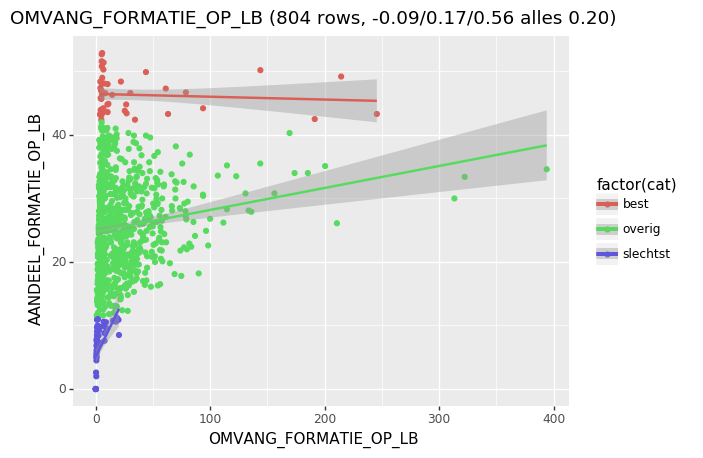

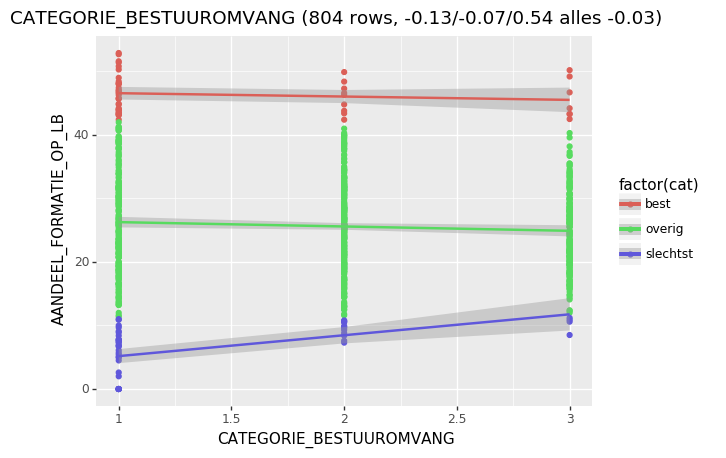

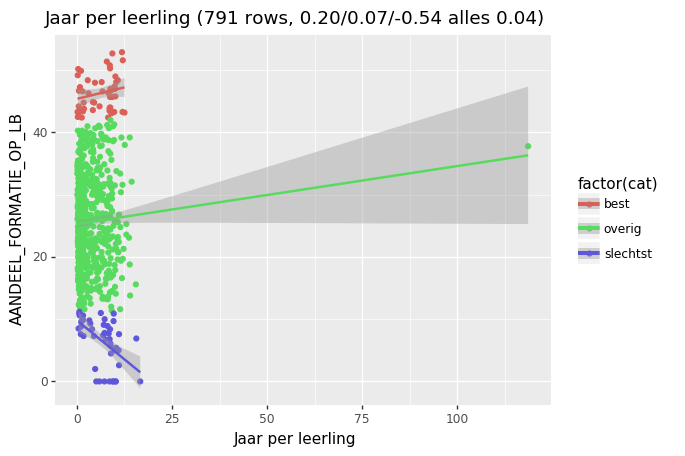

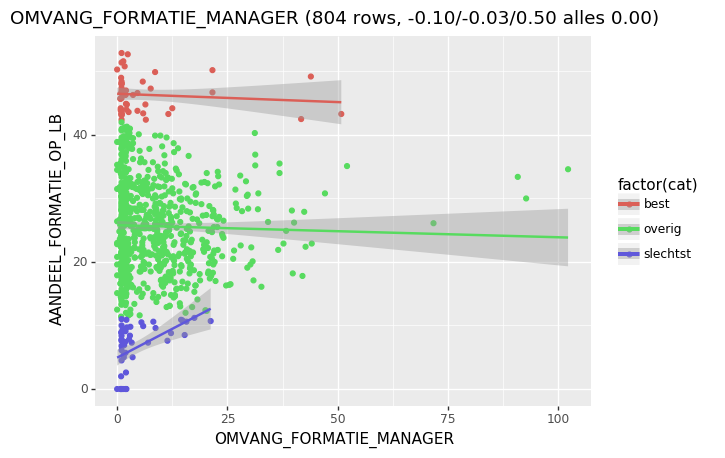

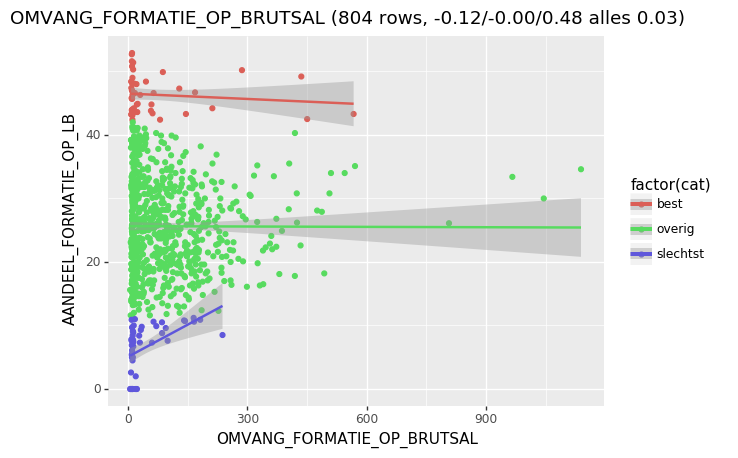

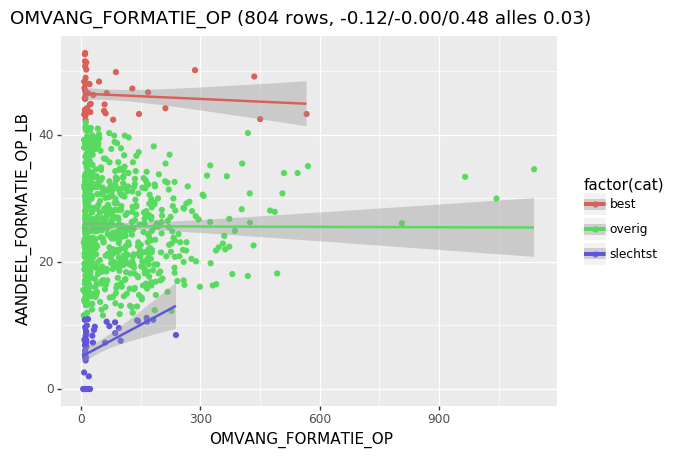

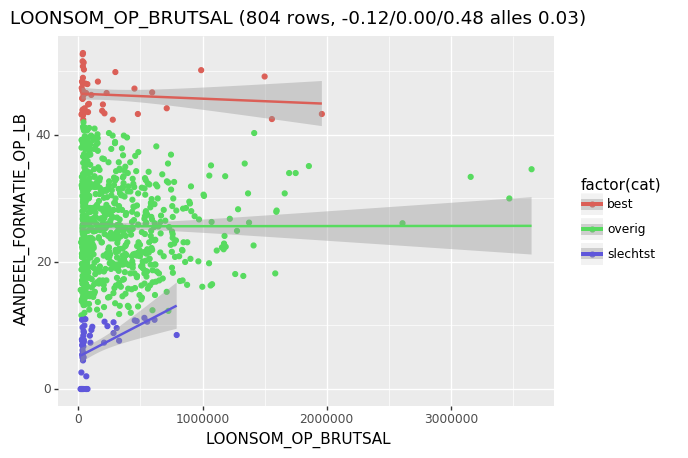

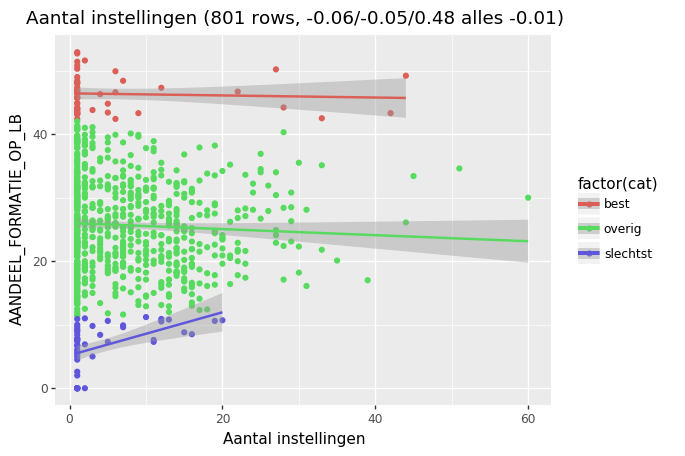

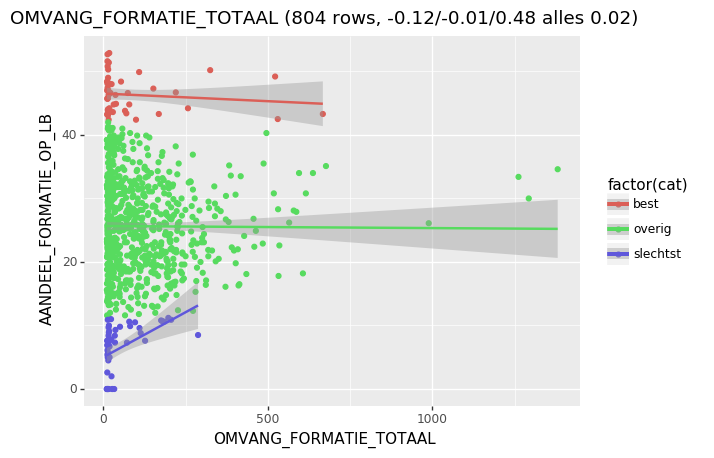

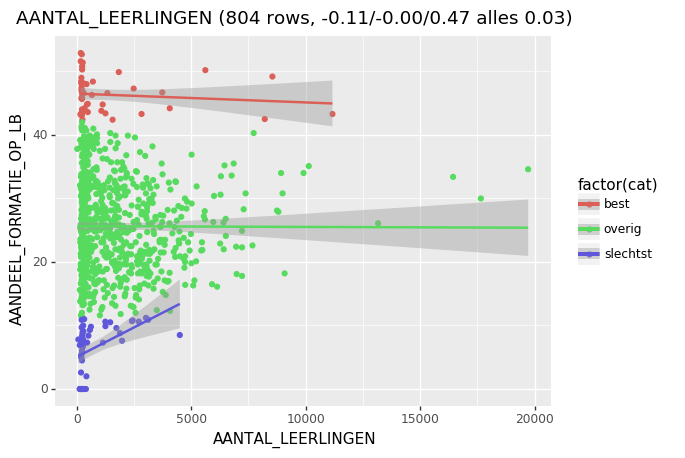

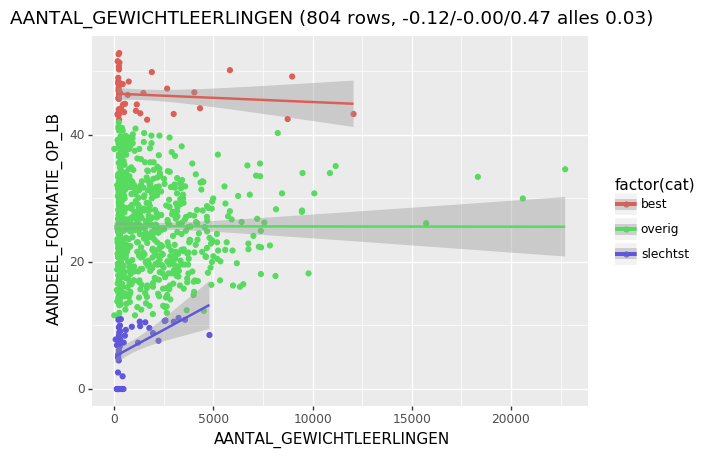

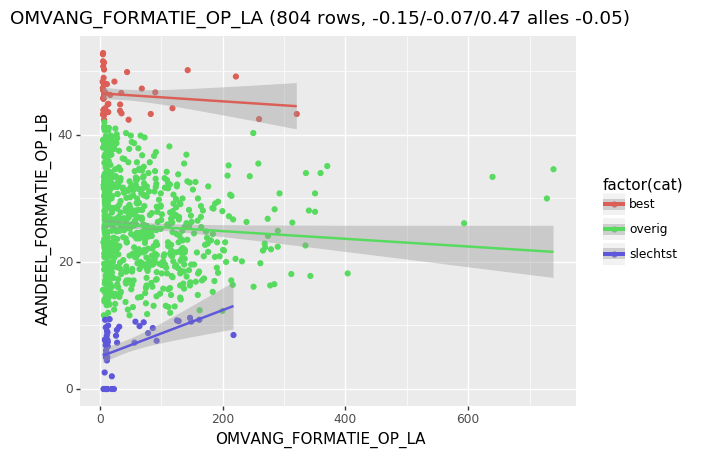

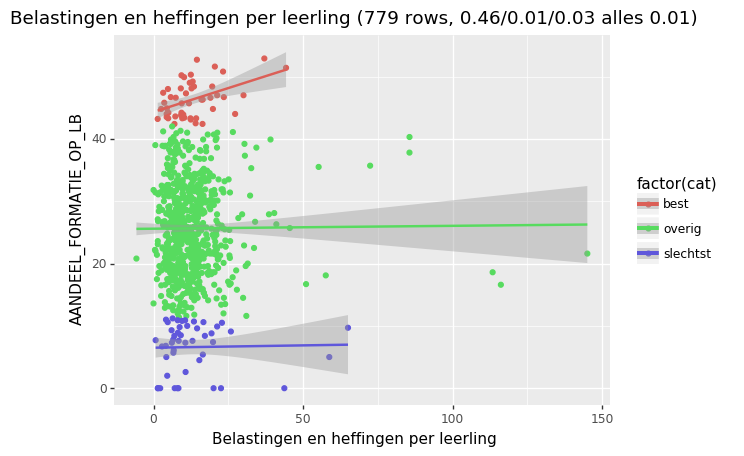

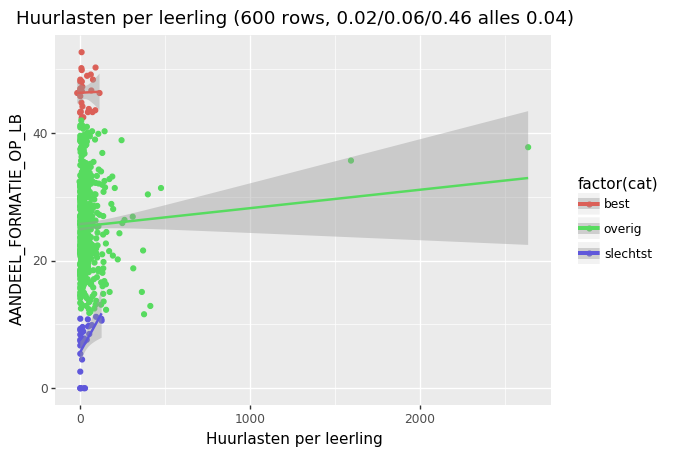

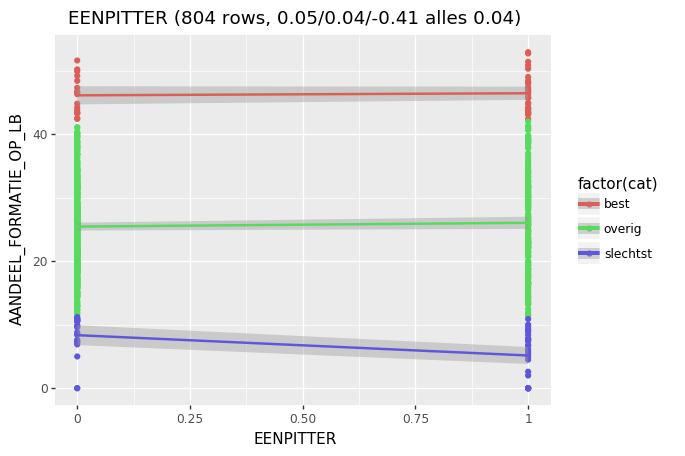

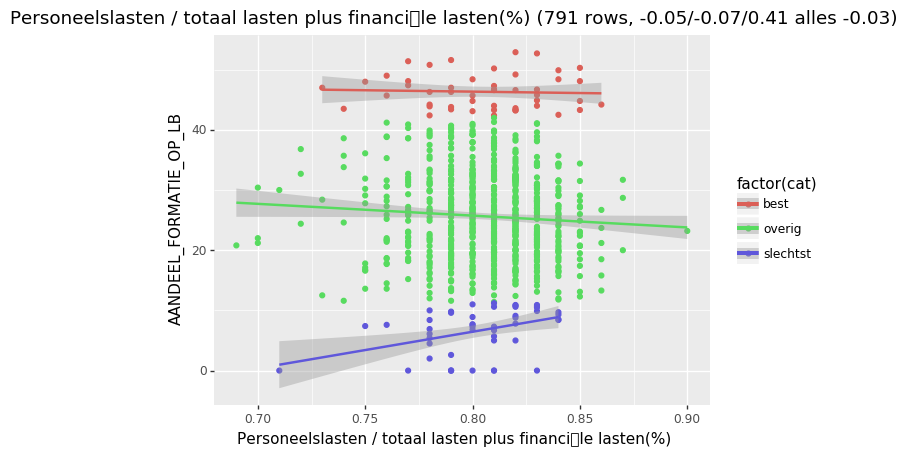

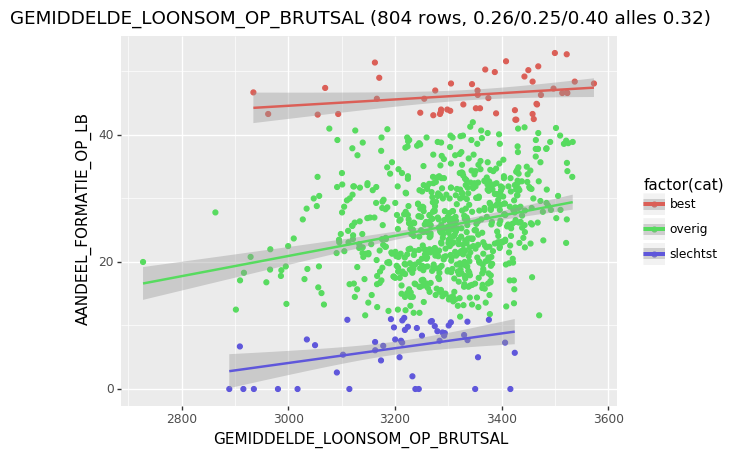

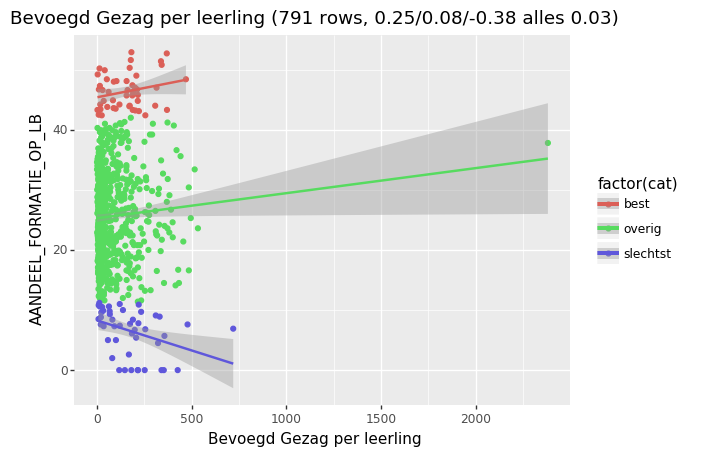

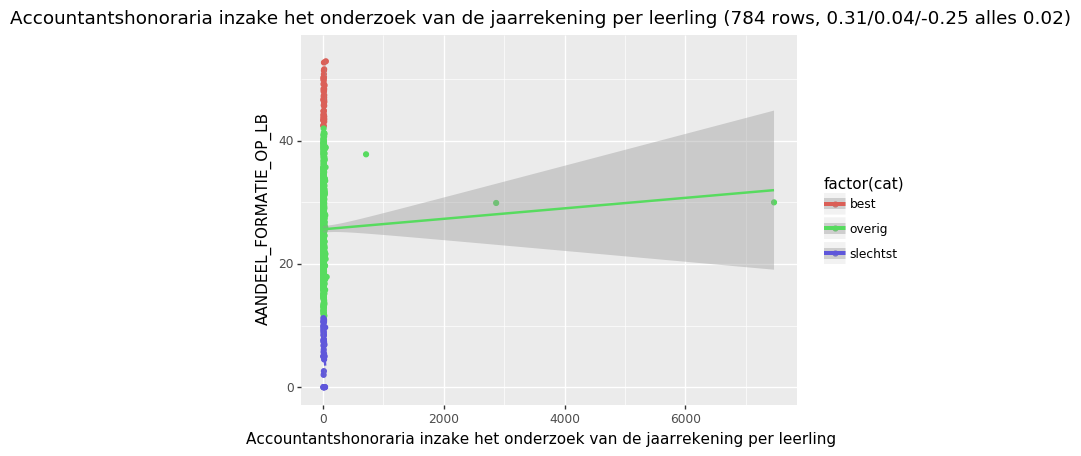

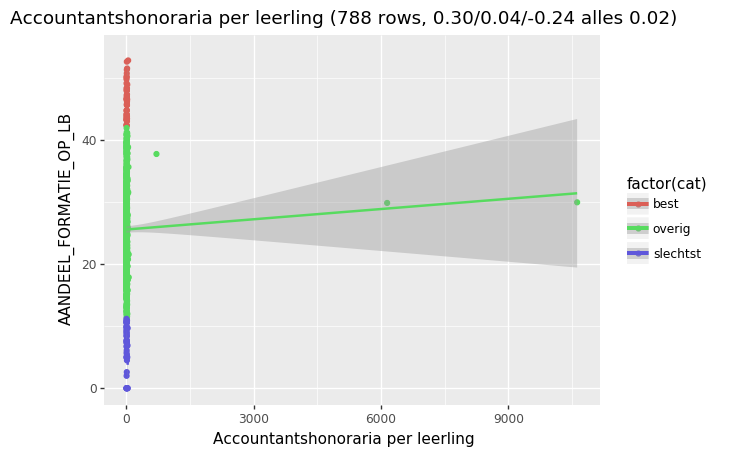

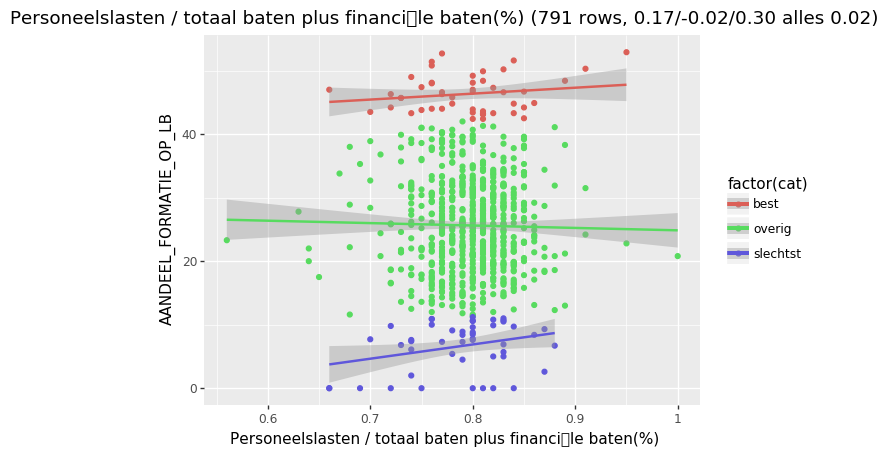

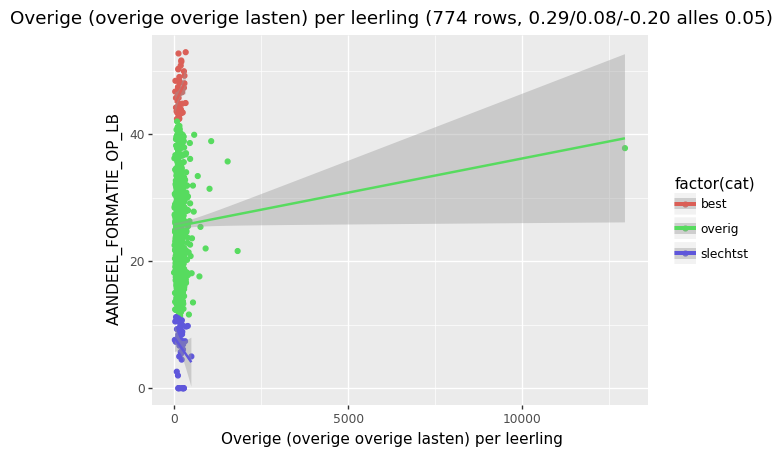

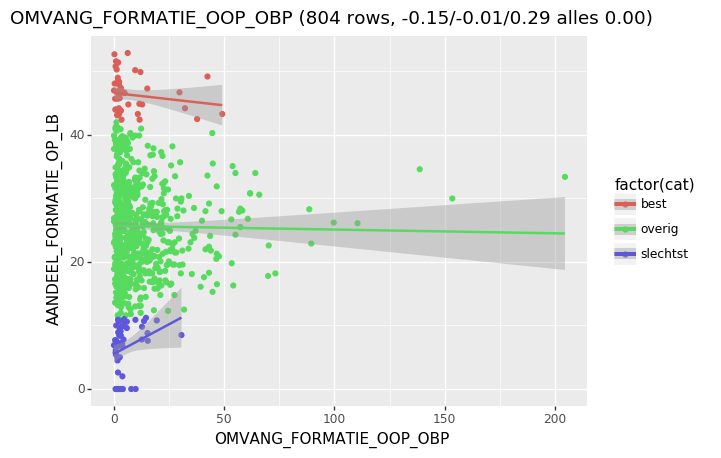

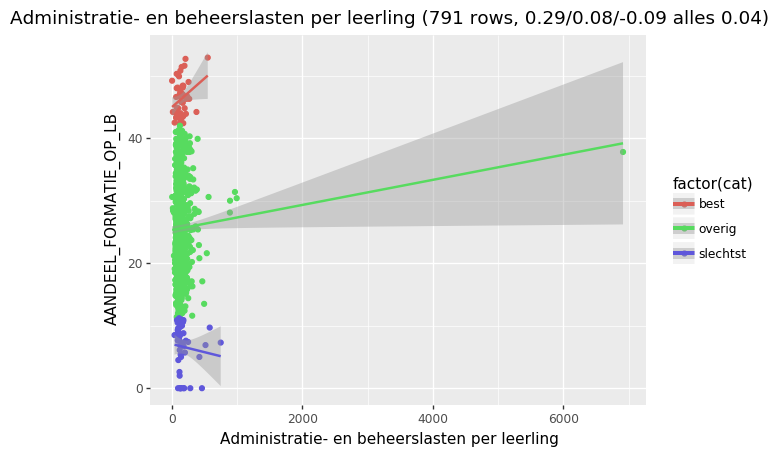

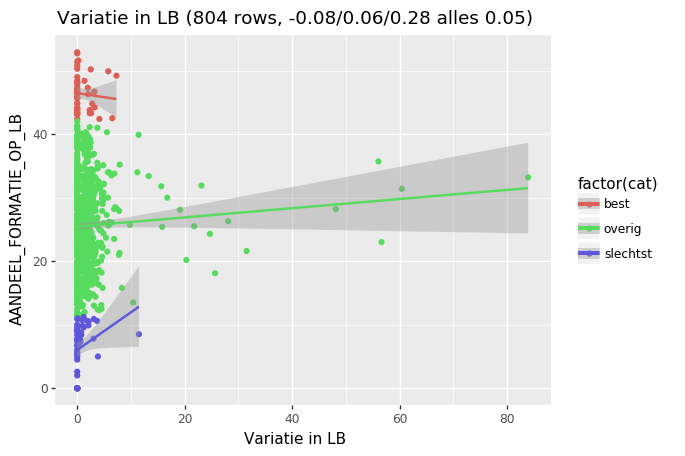

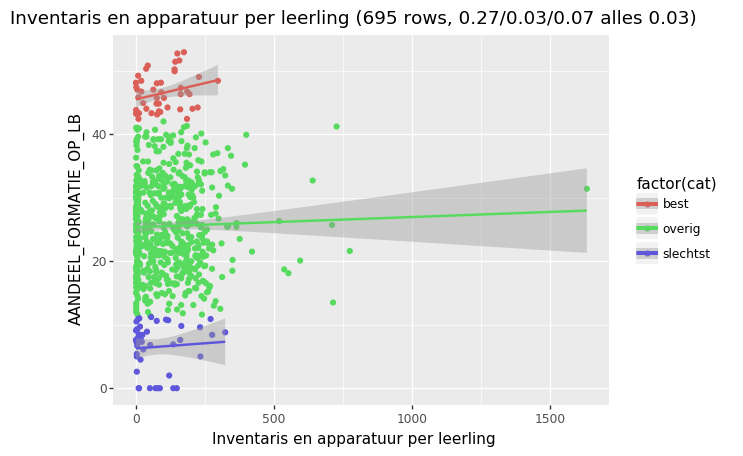

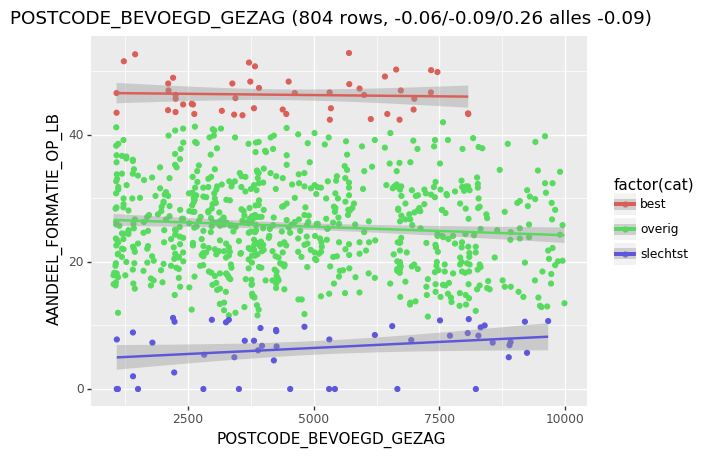

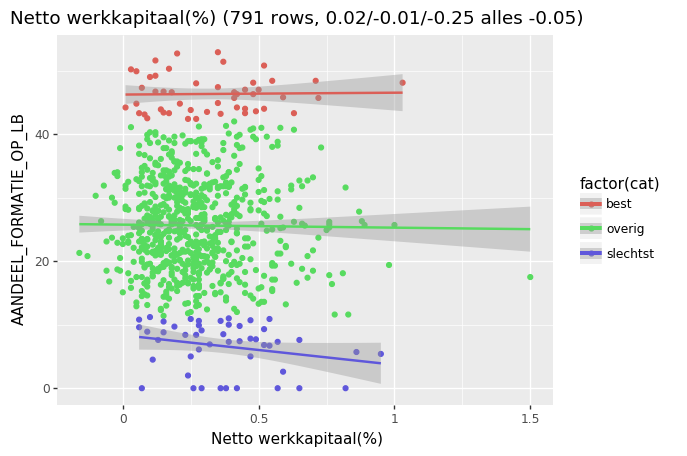

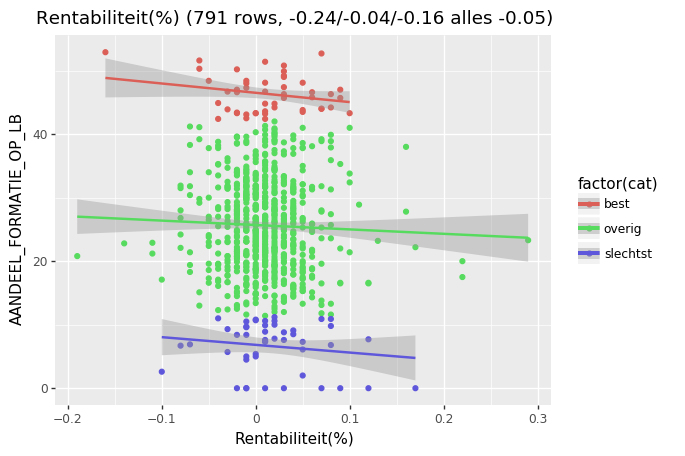

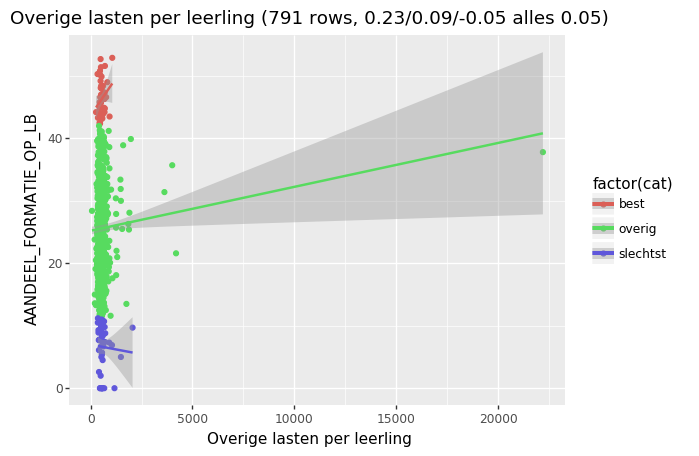

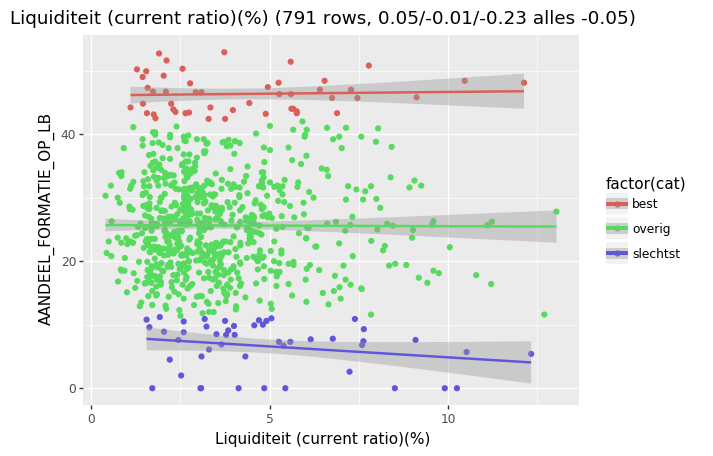

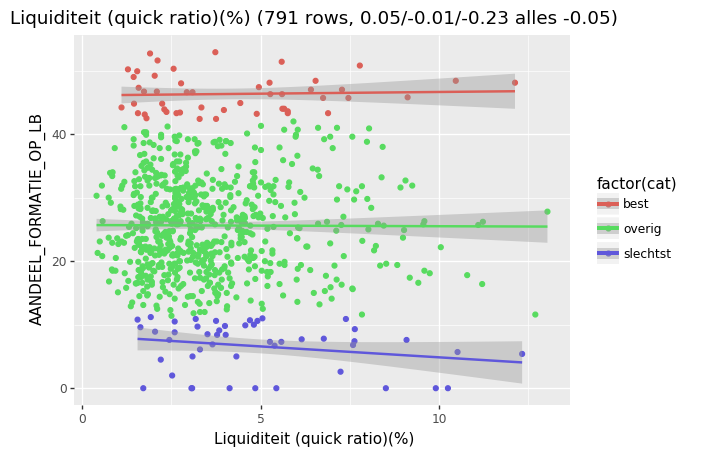

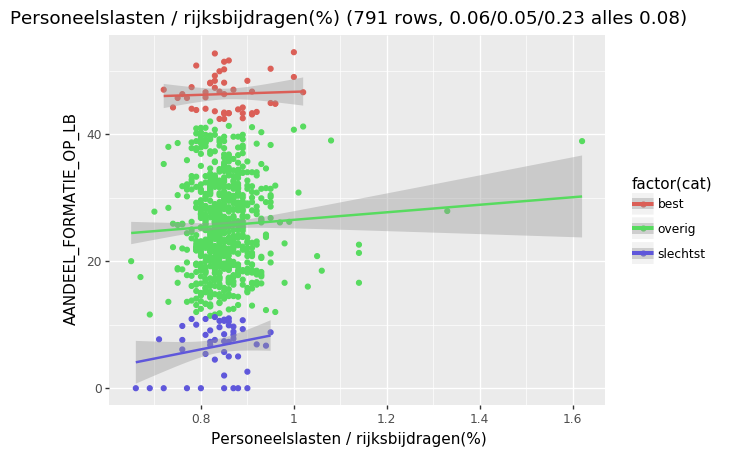

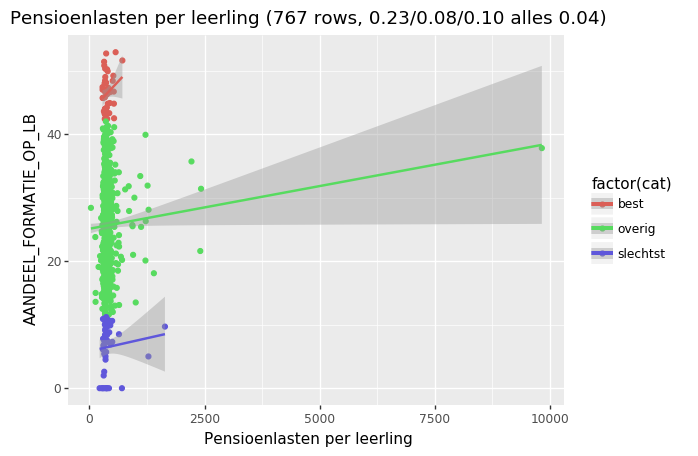

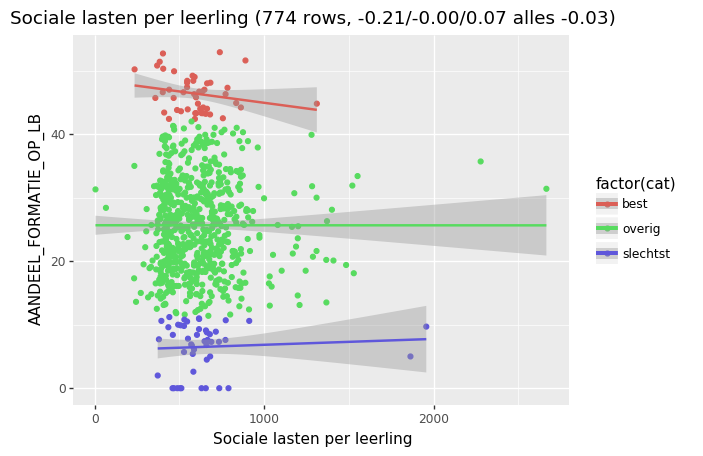

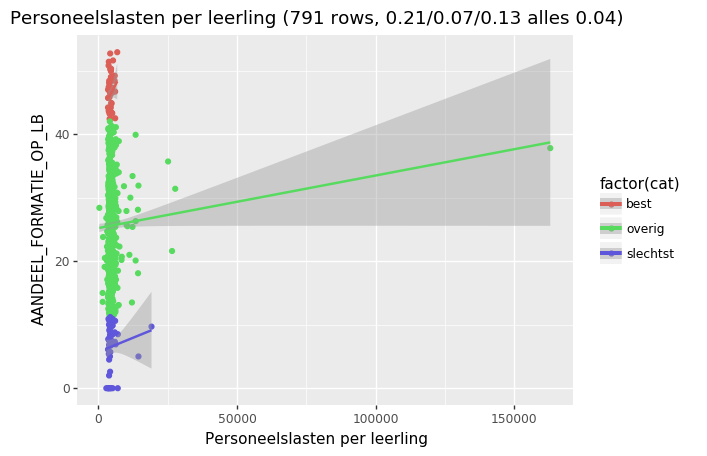

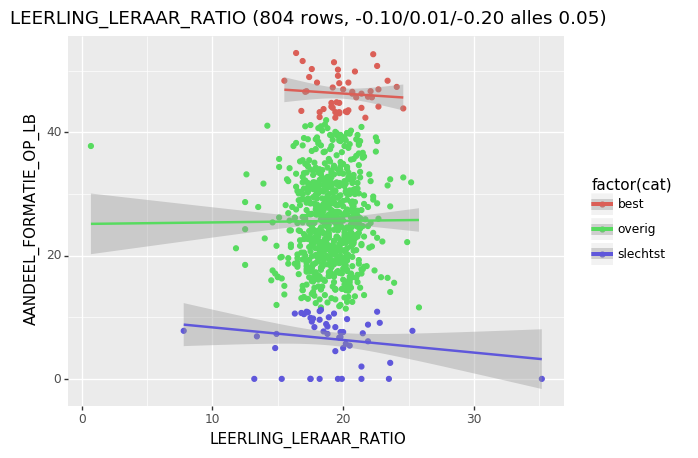

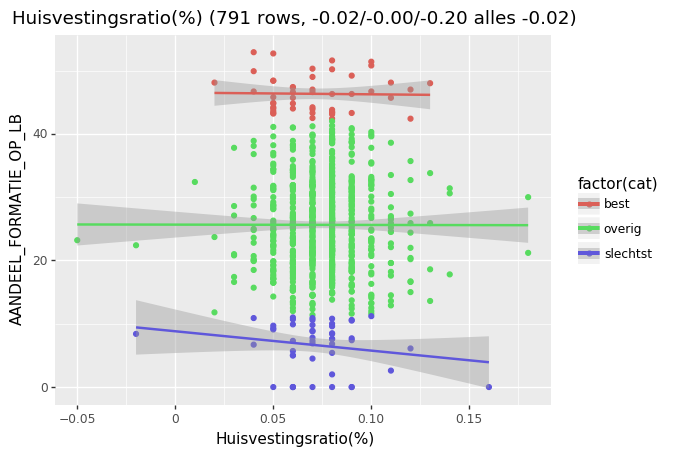

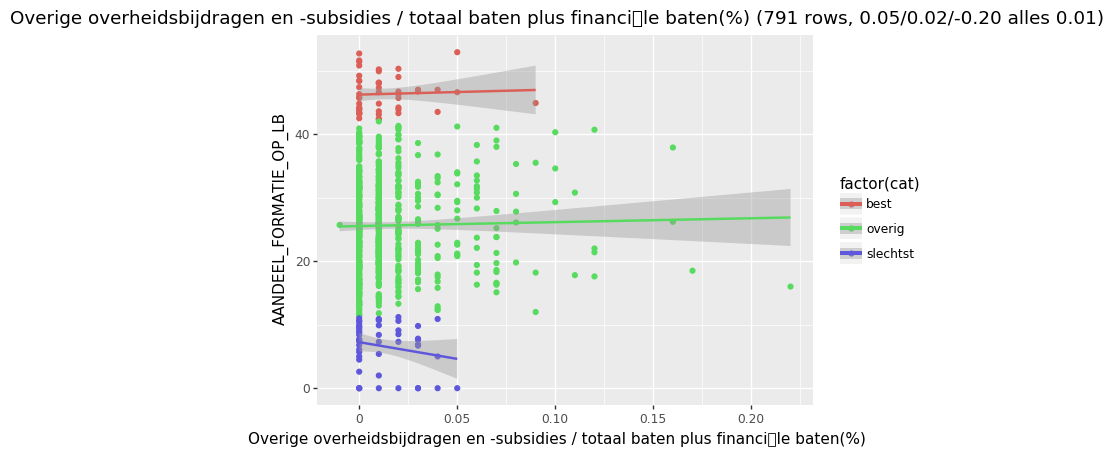

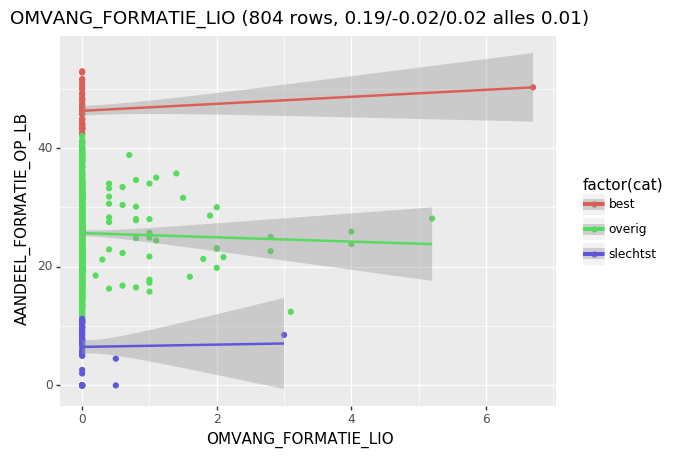

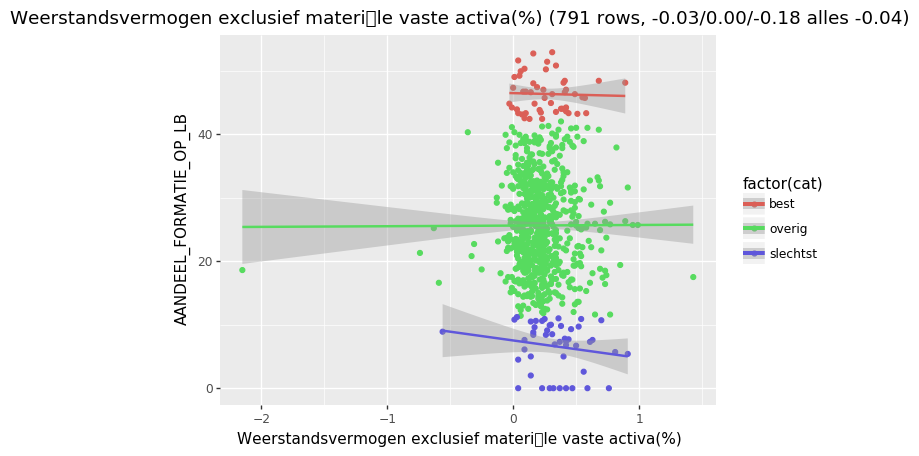

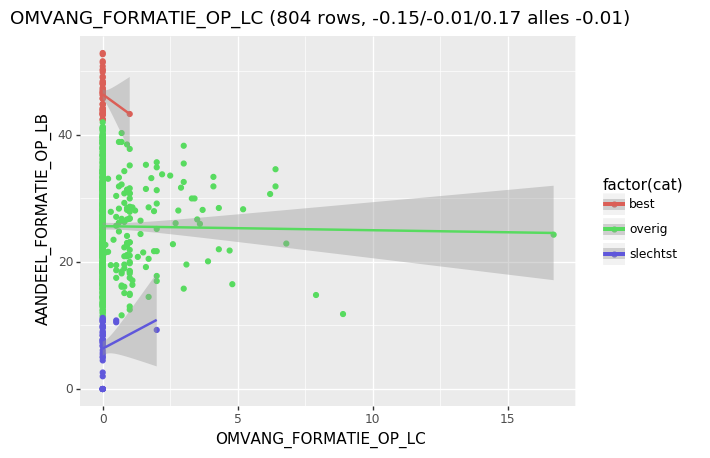

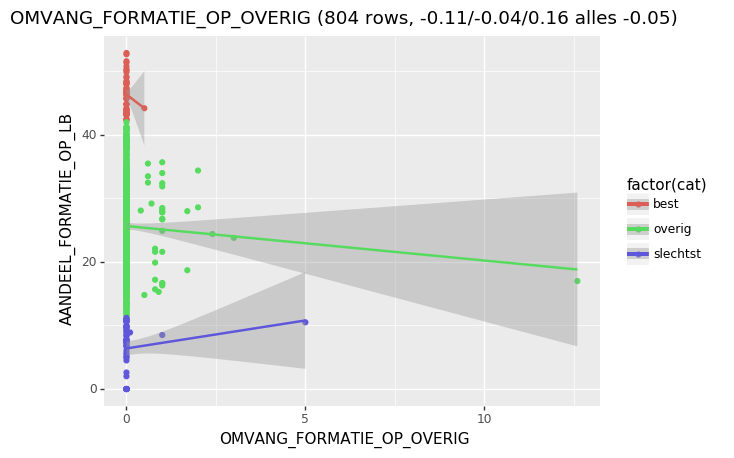

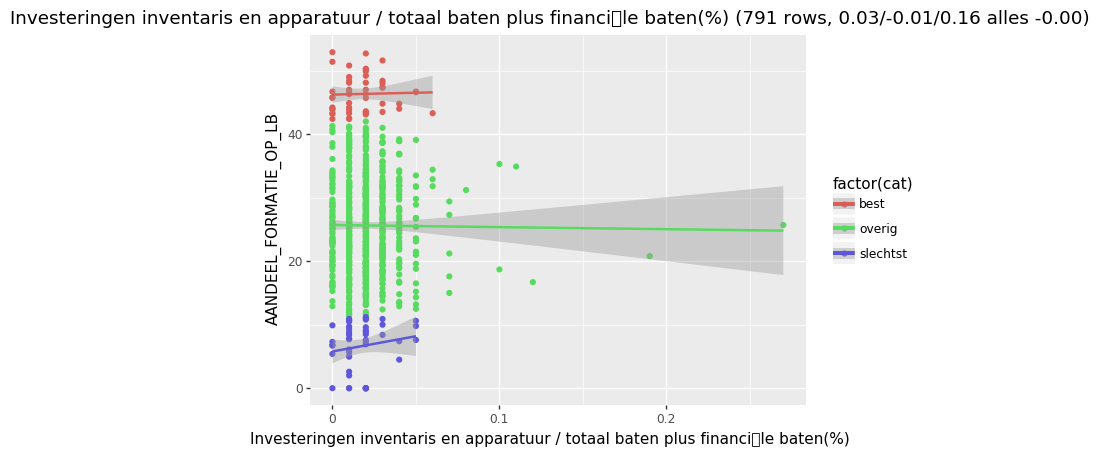

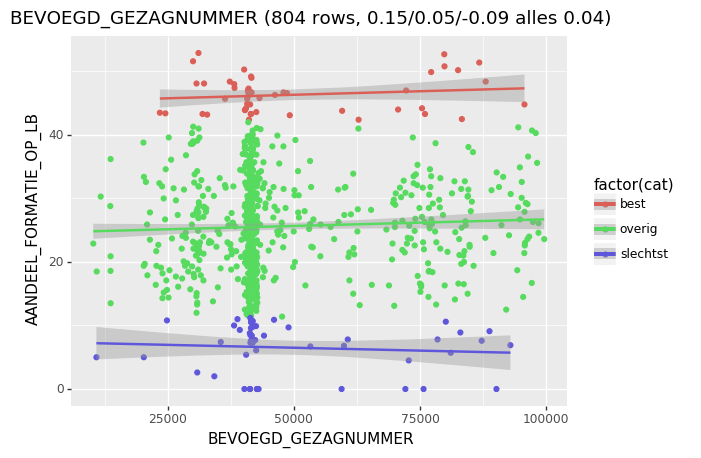

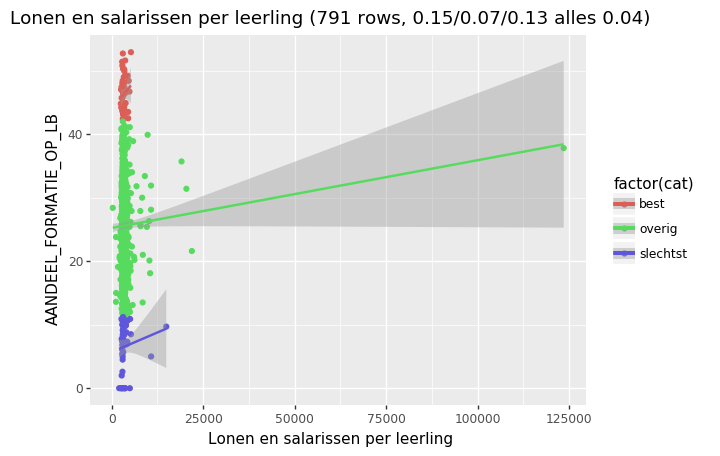

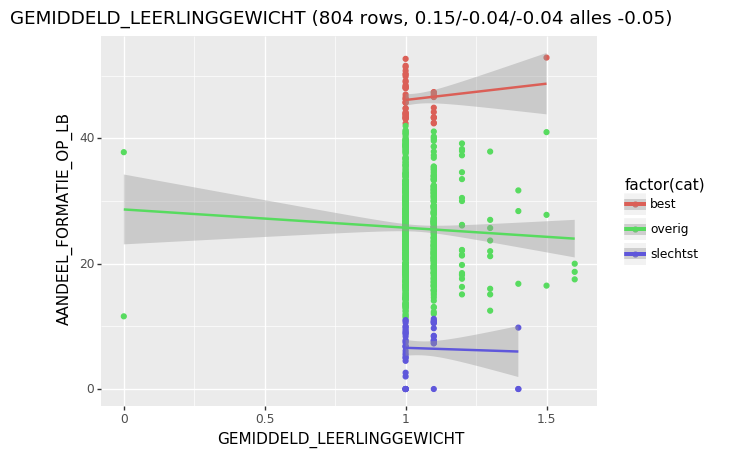

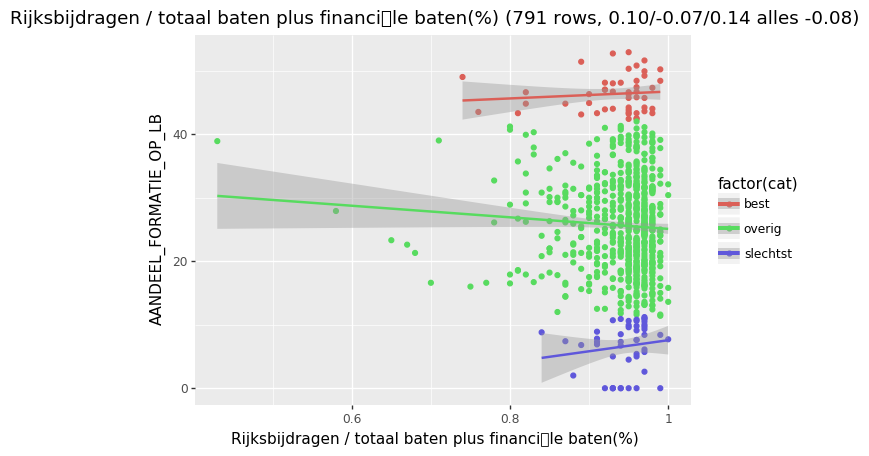

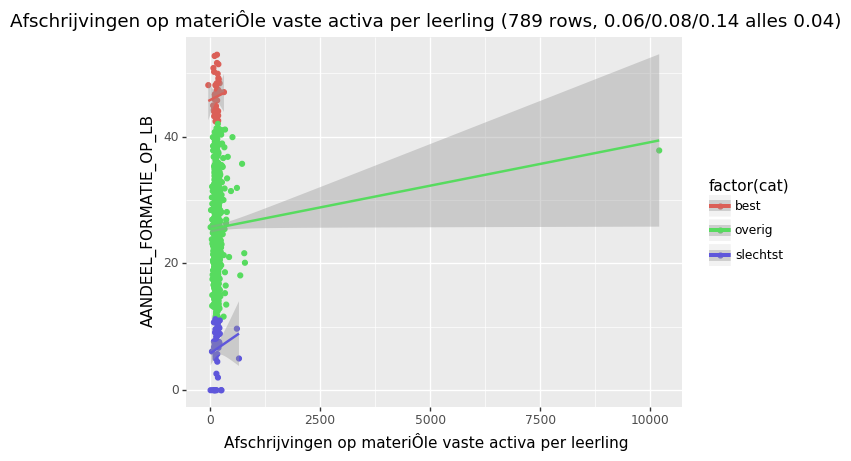

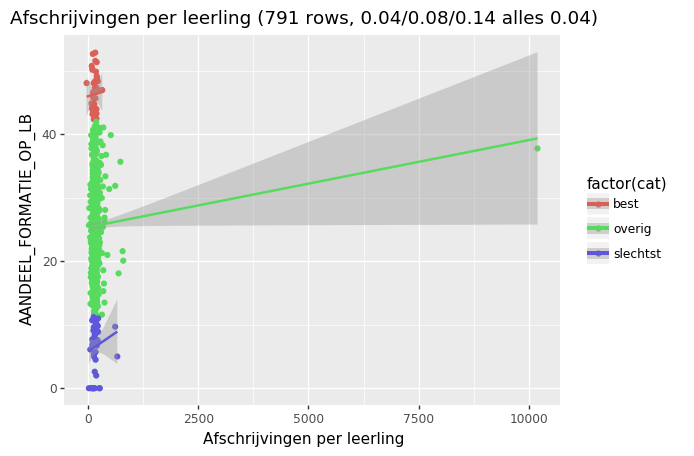

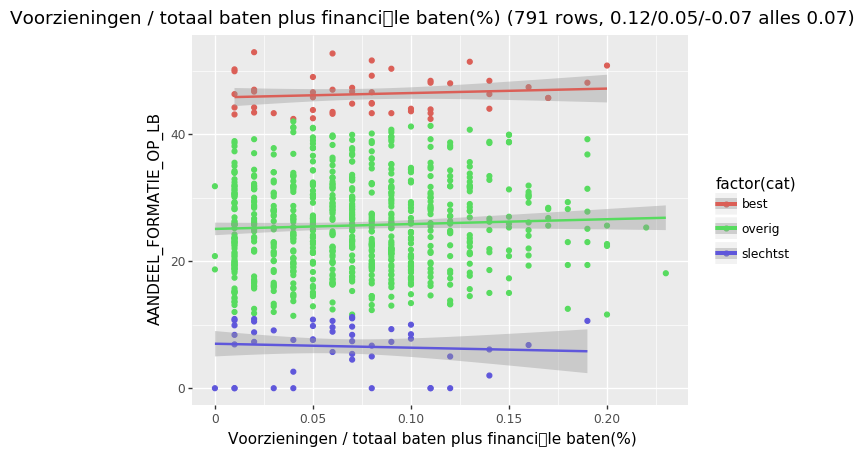

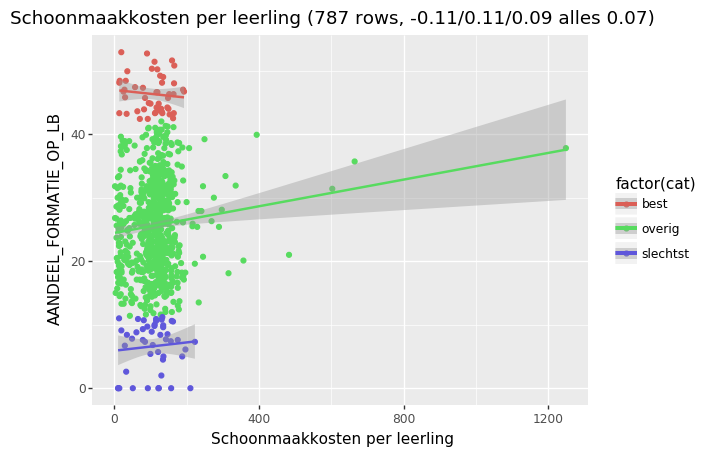

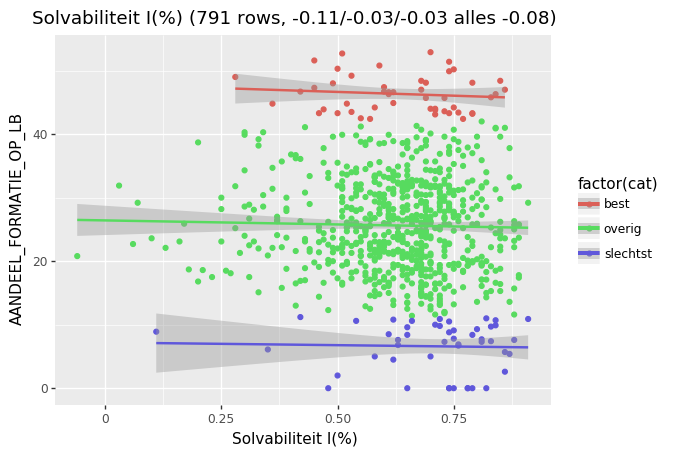

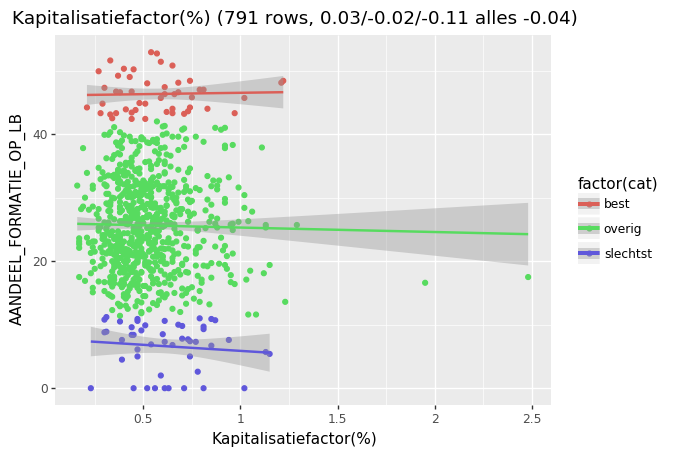

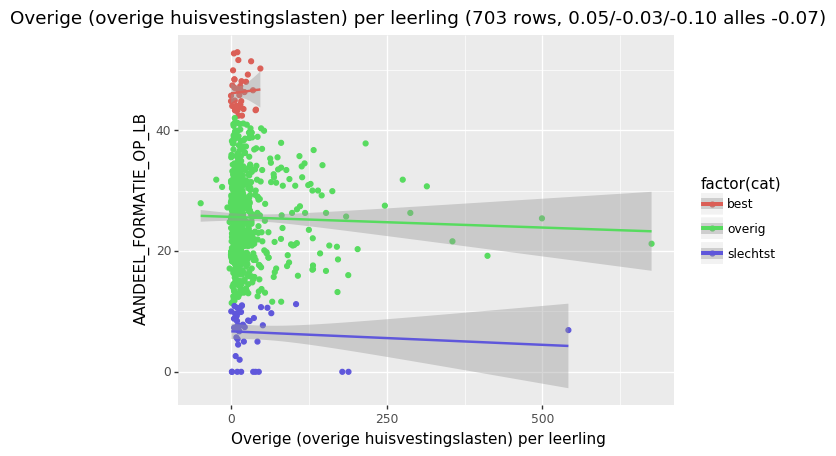

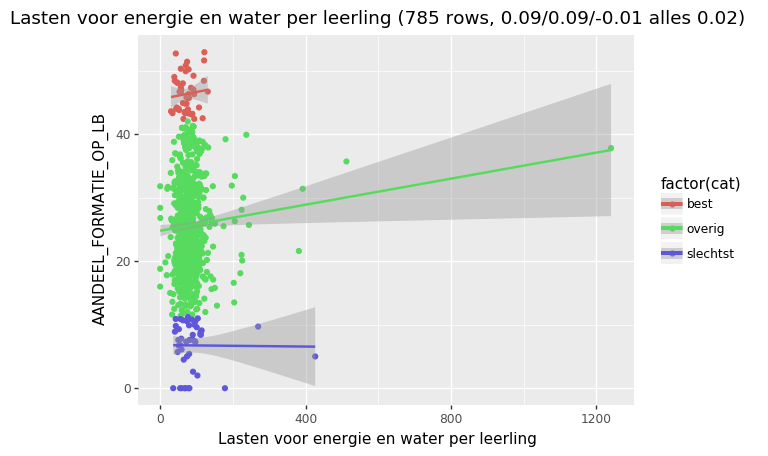

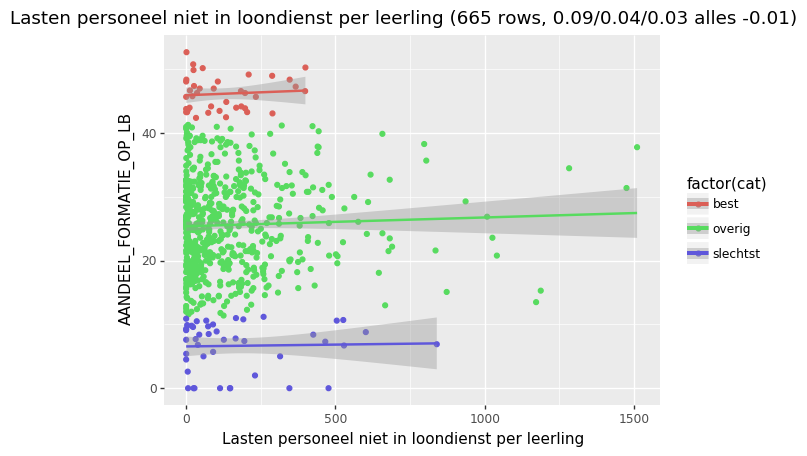

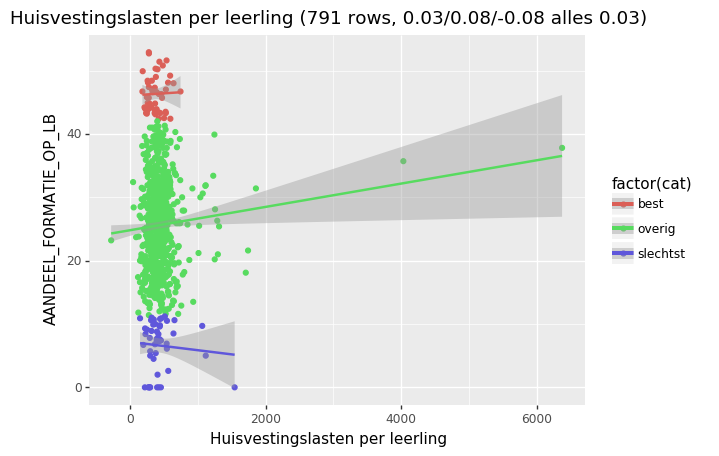

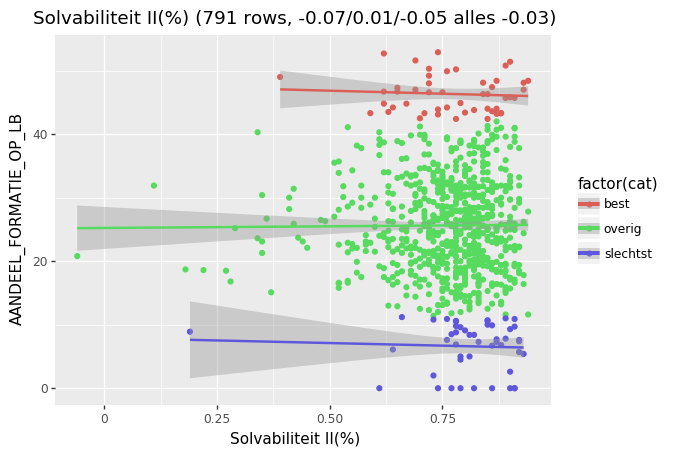

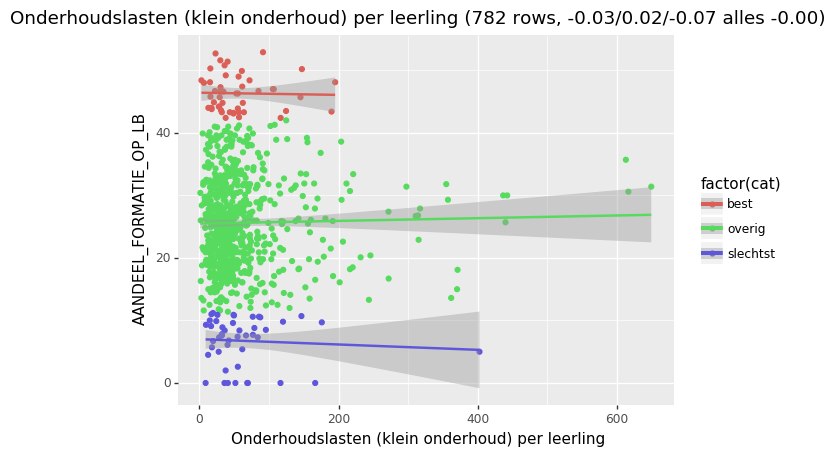

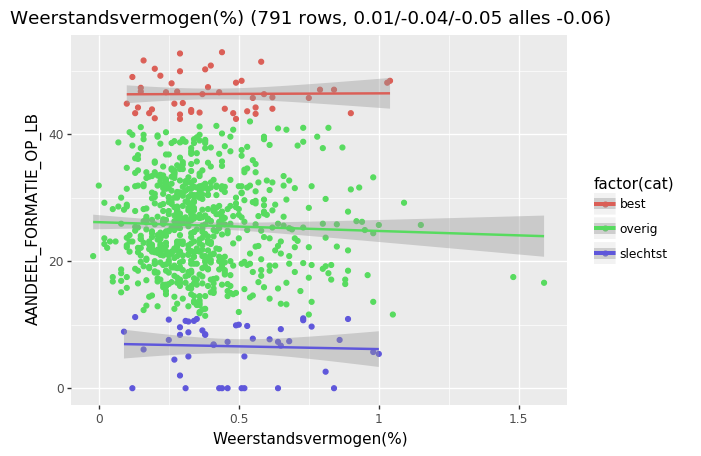

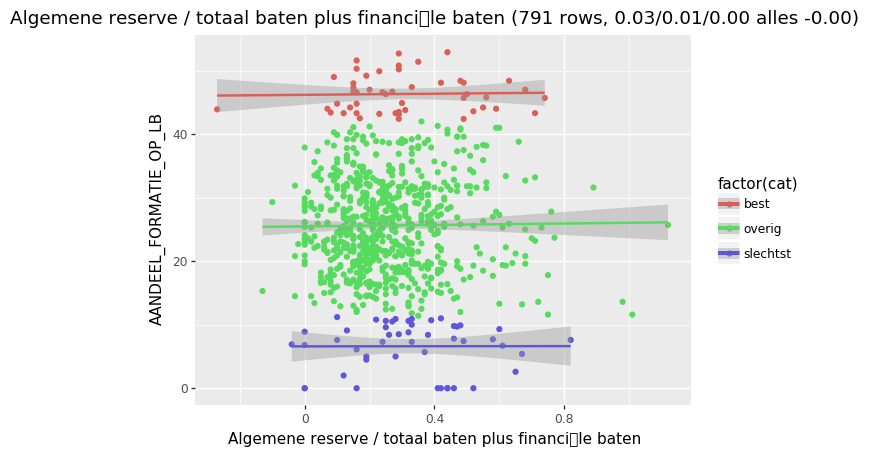

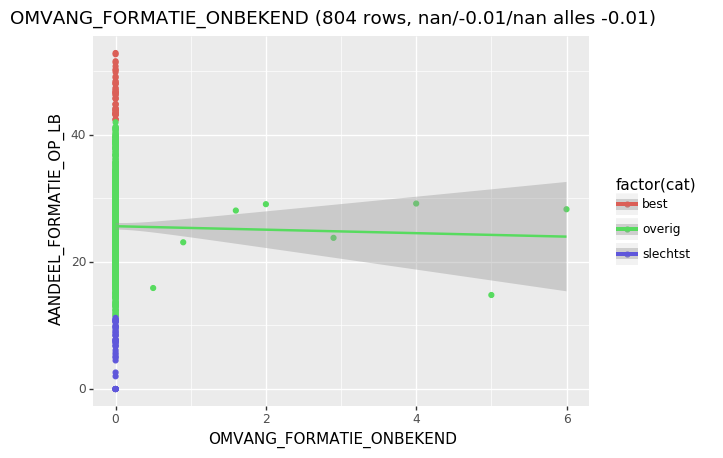

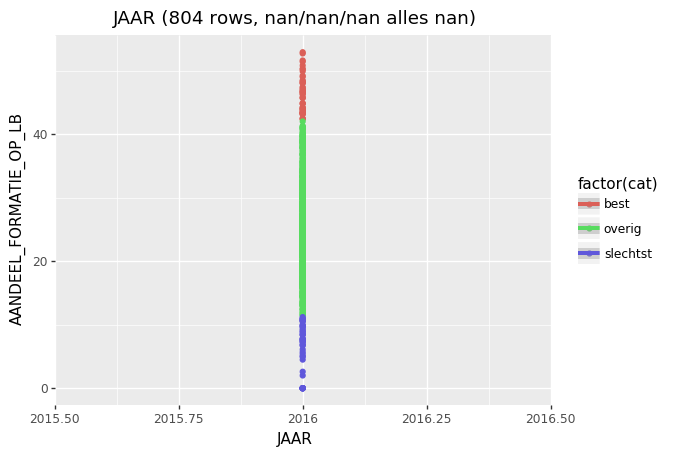

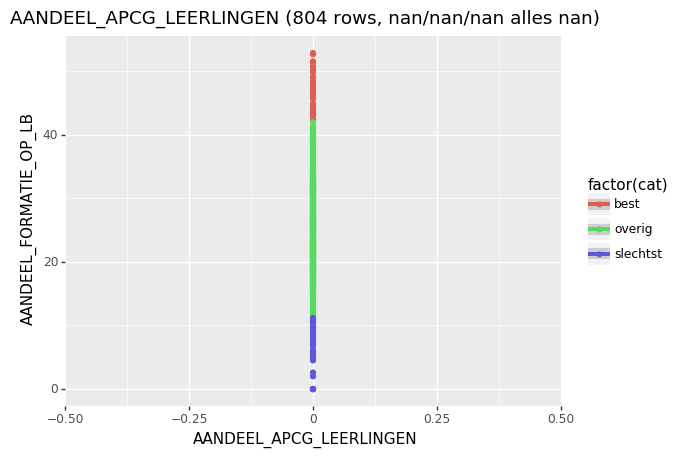

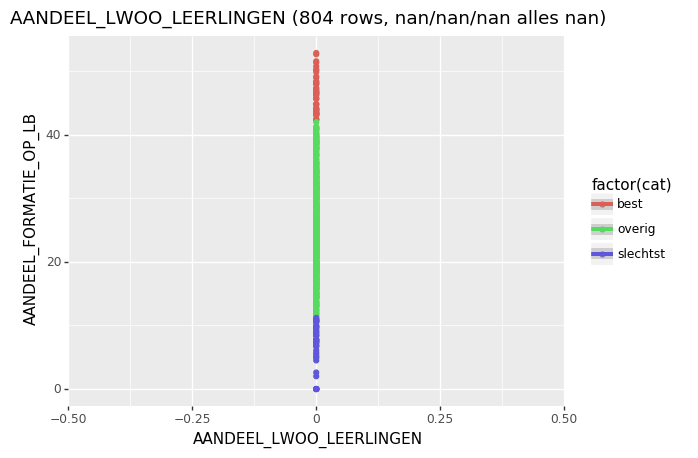

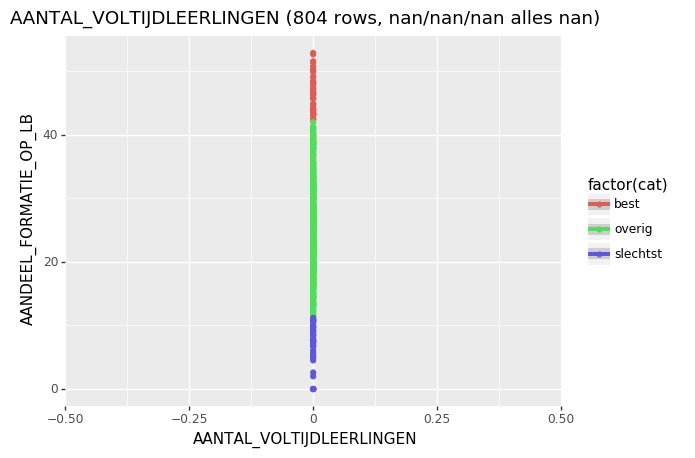

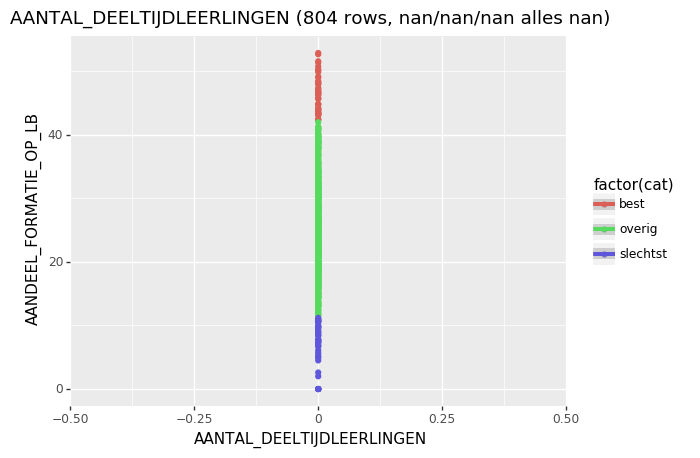

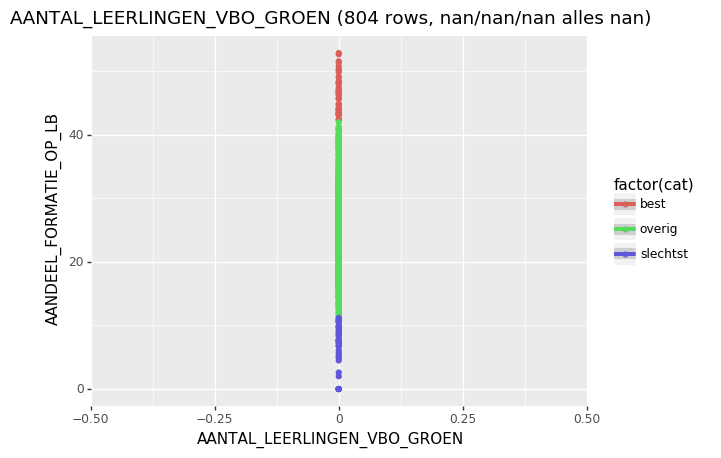

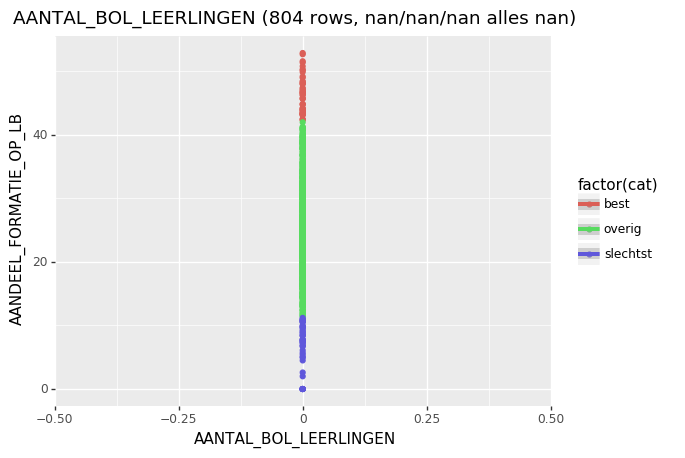

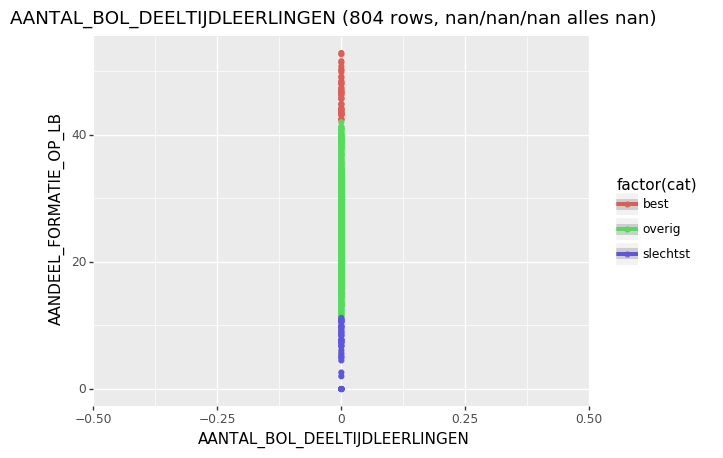

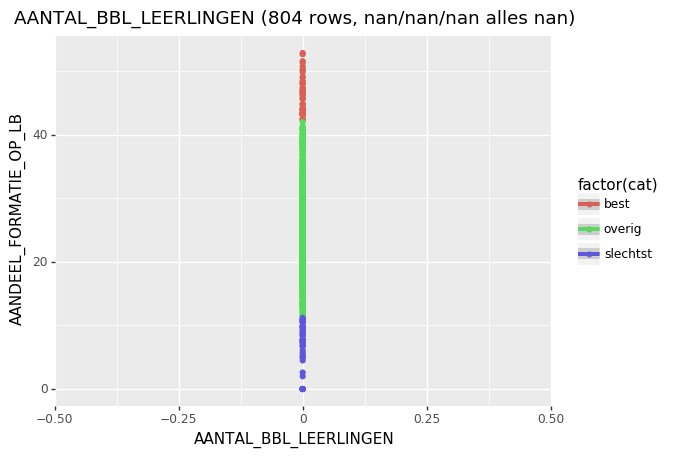

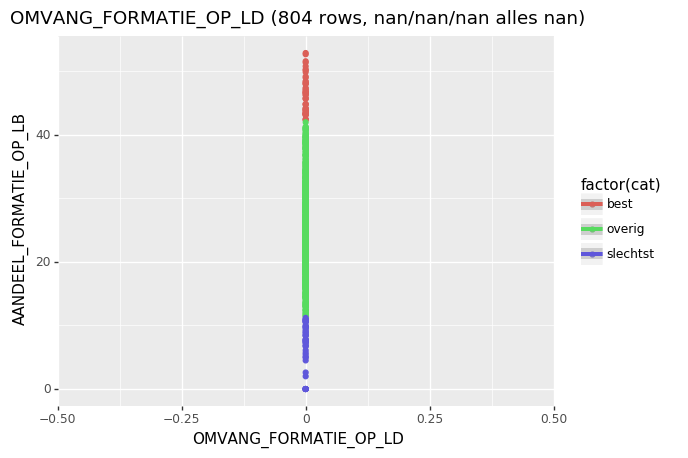

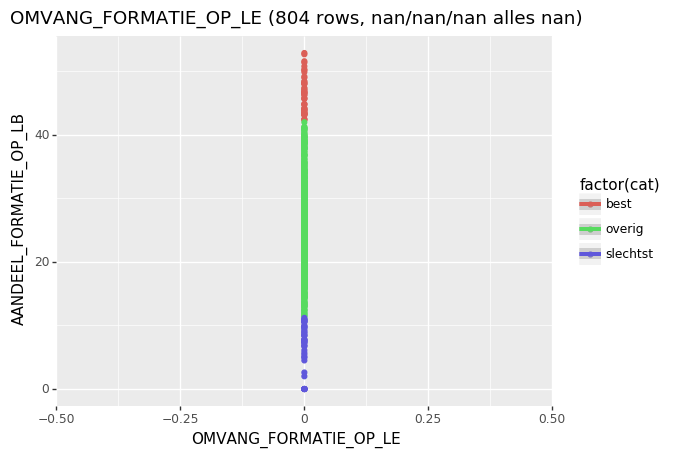

[<ggplot: (287914760)>,
 <ggplot: (287170680)>,
 <ggplot: (-9223372036566151876)>,
 <ggplot: (287899561)>,
 <ggplot: (278714646)>,
 <ggplot: (287911544)>,
 <ggplot: (278702961)>,
 <ggplot: (288613808)>,
 <ggplot: (-9223372036566874017)>,
 <ggplot: (288145258)>,
 <ggplot: (-9223372036575153397)>,
 <ggplot: (278716108)>,
 <ggplot: (-9223372036566248879)>,
 <ggplot: (288535002)>,
 <ggplot: (-9223372036567149831)>,
 <ggplot: (-9223372036575090926)>,
 <ggplot: (-9223372036576060977)>,
 <ggplot: (288618767)>,
 <ggplot: (288519905)>,
 <ggplot: (288517552)>,
 <ggplot: (279672854)>,
 <ggplot: (-9223372036566256089)>,
 <ggplot: (-9223372036566860968)>,
 <ggplot: (288534662)>,
 <ggplot: (288611455)>,
 <ggplot: (-9223372036566255272)>,
 <ggplot: (-9223372036567617911)>,
 <ggplot: (288622838)>,
 <ggplot: (-9223372036575091389)>,
 <ggplot: (288520470)>,
 <ggplot: (-9223372036575091694)>,
 <ggplot: (-9223372036575091249)>,
 <ggplot: (279674474)>,
 <ggplot: (288614839)>,
 <ggplot: (288624048)>,
 <ggpl

In [14]:
%matplotlib inline
import pandas
from sklearn import linear_model as lm
from plotnine import *
import math

root = '/Users/rix0rrr/Google Drive/Hackathon 28_4'
filename = root + '/Team 3/Input voor de lineare regressie-v5.csv'
join_file = root + '/Team 3/Input voor de lineare regressie-financieel-v3.csv'

#df = pandas.read_csv(filename, index_col='BEVOEGD_GEZAGNAAM', encoding='utf-8')
df = pandas.read_csv(filename, index_col='Key', encoding='utf-8')
joinerts = pandas.read_csv(join_file, index_col='Key', encoding='utf-8')

joinert_cols = list(joinerts.columns.values)

df = df.join(joinerts)

for col in joinert_cols:
    try:
        df[col + ' per leerling'] = df[col] / df['AANTAL_LEERLINGEN']
    except Exception as e:
        print(e)
        pass

df = df.drop(joinert_cols, axis=1)
cols = list(df.columns.values)


# Ons jaar
df = df.loc[df['JAAR'] == 2016]

# geen kleine scholen
df = df.loc[df['OMVANG_FORMATIE_TOTAAL'] >= 10]

# omvang besturen
#df = df.loc[df['Aantal instellingen'] >= 6]



print("Besturen in analyse: %s" % len(df))

df = df.sort_values('AANDEEL_FORMATIE_OP_LB')
df.loc[:, 'cat'] = 'overig'
df.loc[:50, 'cat'] = 'slechtst'
df.loc[-50:, 'cat'] = 'best'

print('De allerbeste is %s dus die doet niet meer mee' % df[-1:][['BEVOEGD_GEZAGNAAM', 'AANDEEL_FORMATIE_OP_LB']])

df = df[:-1]

cols = [c for c in cols if not c.startswith('AANDEEL_FORMATIE_')]

graphs = []

for x_as in cols:
    #x_as = 'SolvabiliteitI.2016'
    y_as = 'AANDEEL_FORMATIE_OP_LB'

    rows = df[[x_as, y_as, 'cat']].dropna()
    if not len(rows):
        print('NO NON-NA ROWS')
        continue
    
    try:
        best_corr = rows.loc[rows['cat'] == 'best', [x_as, y_as]].corr()[x_as][y_as]
        overig_corr = rows.loc[rows['cat'] == 'overig', [x_as, y_as]].corr()[x_as][y_as]
        slechtst_corr = rows.loc[rows['cat'] == 'slechtst', [x_as, y_as]].corr()[x_as][y_as]
        alles_corr = rows.loc[:, [x_as, y_as]].corr()[x_as][y_as]
        
        corrs = [best_corr, overig_corr, slechtst_corr, alles_corr]
        
        corrs = [abs(c) for c in corrs if not math.isnan(c)]
        max_corr = max(corrs) if corrs else 0
        
        graphs.append((max_corr, ggplot(rows, aes(x_as, y_as, color='factor(cat)'))
         + ggtitle('%s (%s rows, %.2f/%.2f/%.2f alles %.2f)' % (x_as, len(rows), best_corr, overig_corr, slechtst_corr, alles_corr))
         + geom_point()
         + stat_smooth(method='lm')))
    except Exception as e:
        print(e)
        pass
    
graphs.sort(key=lambda x: x[0], reverse=True)
graphs = [x[1] for x in graphs]
graphs